In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pandas_datareader.data as web
import quandl
import datetime as dt
import seaborn as sns          
sns.set()

In [2]:
start = dt.datetime(1990, 1, 20)
end = dt.datetime.now()

In [3]:
df = web.DataReader("^GSPC", 'yahoo', start, end)
df.rename(columns={'Adj Close': "SP500"}, inplace=True)
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

In [4]:
df_VIX = web.DataReader("^VIX", 'yahoo', start, end)
df = df.merge(df_VIX, left_on='Date', right_on='Date')
df.rename(columns={'Adj Close': "VIX"}, inplace=True)
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

In [5]:
df.head()

,SP500,VIX
Date,,
1990-01-22,330.380005,26.700001
1990-01-23,331.609985,24.719999
1990-01-24,330.260010,25.389999
1990-01-25,326.079987,25.629999
1990-01-26,325.799988,26.280001


In [6]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [7]:
normalized_df['VIX'] = normalized_df['VIX'].rolling(window=25).mean()
normalized_df['SP500'] = normalized_df['SP500'].rolling(window=25).mean()

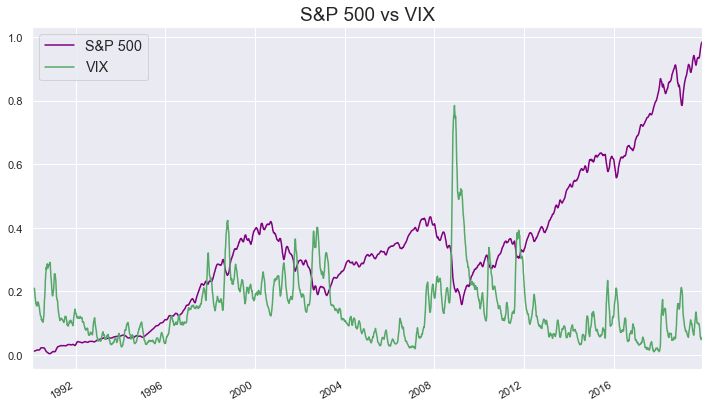

In [8]:
normalized_df['SP500'].plot(color='purple', label='S&P 500')
normalized_df['VIX'].plot(figsize=(12, 7), color='g', label='VIX')

plt.legend(loc="upper left", fontsize='x-large');
plt.title('S&P 500 vs VIX', fontsize=19)
plt.xlabel('')
plt.plot();
plt.savefig('SP500vsVIX')

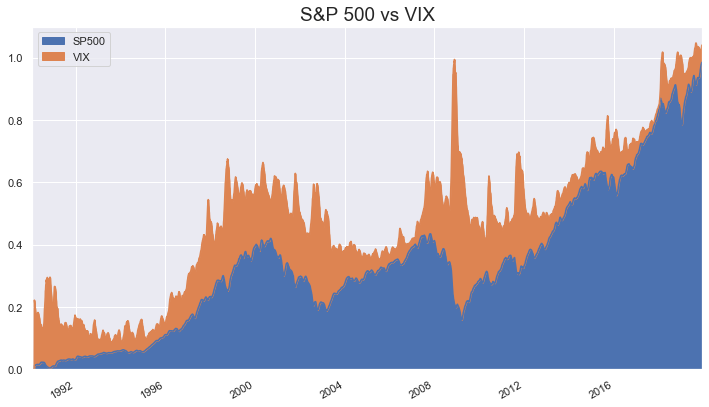

In [9]:
df2 = pd.DataFrame(normalized_df, columns=['SP500', 'VIX'])
df2.plot.area(figsize=(12, 7), stacked=True);
plt.xlabel('');
plt.title('S&P 500 vs VIX', fontsize=19);